In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
from scipy.stats import skew
from pycaret.regression import setup, compare_models

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [3]:
train_data_path = 'Datasets/Boston House Prices (train).csv'
test_data_path = 'Datasets/Boston House Prices (test).csv'

In [4]:
df_train = pd.read_csv(train_data_path)
df_test = pd.read_csv(test_data_path)

In [5]:
df_train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
target = df_train['SalePrice']
IDs = df_test['Id']

In [8]:
data = pd.concat([df_train.drop(columns = ['SalePrice', 'Id']), df_test.drop(columns = 'Id')])
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [9]:
MSSubClass = data['MSSubClass']


In [10]:
data1 = data.copy()
data1['MSSubClass'] = data1['MSSubClass'].astype(str)

In [11]:
data1.select_dtypes('object').loc[:, data1.isnull().sum() > 0].columns

Index(['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType'],
      dtype='object')

In [12]:
constant_impute = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 
'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
mode_impute = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 
'MasVnrType', 'Electrical', 'KitchenQual', 'Functional', 'SaleType']

for column in constant_impute:
    data1[column] = data1[column].fillna('None')

for column in mode_impute:
    data1[column] = data1[column].fillna(data1[column].mode()[0])

In [13]:
def knn_impute(df, target):
    df = df.copy()
    df = df.select_dtypes(np.number)
    non_na_cols = df.loc[:, df.isna().sum() == 0].columns
    
    ytrain = df.loc[df[target].isna() == False, target]
    xtrain = df.loc[df[target].isna() == False, non_na_cols]
    xtest = df.loc[df[target].isna(), non_na_cols]

    knn = KNeighborsRegressor()
    knn.fit(xtrain, ytrain)
    ypred = knn.predict(xtest)

    df.loc[df[target].isna(), target] = ypred
    
    return df


In [14]:
data1.isna().sum()[data1.isna().sum() > 0].index

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea'],
      dtype='object')

In [15]:
data2 = data1.copy()


In [16]:
numeric_impute = ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea']

for column in numeric_impute:
    data2 = knn_impute(data2, column)

In [17]:
data2.isna().sum()

LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [18]:
data3 = data2.copy()

In [19]:
skew_df = pd.DataFrame(data3.select_dtypes(np.number).columns, columns = ['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature : skew(data3[feature]))
skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = [x > 0.5 for x in skew_df['Absolute Skew']]
skew_df

,Feature,Skew,Absolute Skew,Skewed
0,LotFrontage,1.340751,1.340751,True
1,LotArea,12.822431,12.822431,True
2,OverallQual,0.197110,0.197110,False
3,OverallCond,0.570312,0.570312,True
4,YearBuilt,-0.599806,0.599806,True
5,YearRemodAdd,-0.451020,0.451020,False
6,MasVnrArea,2.603682,2.603682,True
7,BsmtFinSF1,1.425516,1.425516,True
8,BsmtFinSF2,4.146111,4.146111,True
9,BsmtUnfSF,0.919322,0.919322,True


In [20]:
import matplotlib.pyplot as plt

(array([174., 300., 696., 877., 546., 198.,  72.,  31.,  11.,   6.,   3.,
          2.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([ 21. ,  35.6,  50.2,  64.8,  79.4,  94. , 108.6, 123.2, 137.8,
        152.4, 167. , 181.6, 196.2, 210.8, 225.4, 240. , 254.6, 269.2,
        283.8, 298.4, 313. ]),
 <BarContainer object of 20 artists>)

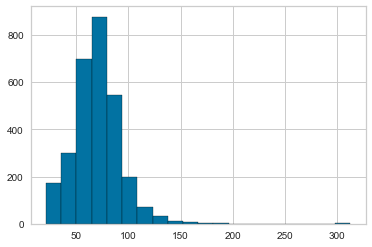

In [21]:
plt.hist(data3['LotFrontage'], bins = 20, edgecolor = 'black');

In [22]:
data3['LotFrontage'].describe()

count    2919.000000
mean       70.154916
std        22.697641
min        21.000000
25%        60.000000
50%        70.000000
75%        80.100000
max       313.000000
Name: LotFrontage, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x23fee032208>,
 'caps': [<matplotlib.lines.Line2D at 0x23fee032cc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x23fee029b88>],
 'medians': [<matplotlib.lines.Line2D at 0x23fee039588>],
 'fliers': [<matplotlib.lines.Line2D at 0x23fee039a08>],
 'means': []}

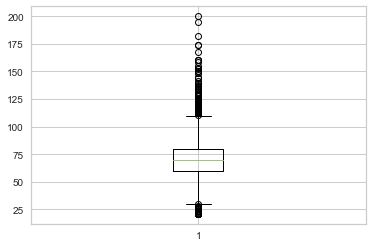

In [23]:
plt.boxplot(data3['LotFrontage'].drop(data3['LotFrontage'][data3['LotFrontage'] > 300.00].index));

In [24]:
skew(data3['LotFrontage'].drop(data3['LotFrontage'][data3['LotFrontage'] > 300.00].index))

0.5892160236020689

(array([114.,  84., 135., 292., 643., 501., 512., 292., 139.,  97.,  30.,
         35.,  18.,   6.,   7.,   4.,   1.,   3.,   0.,   2.]),
 array([ 21.  ,  29.95,  38.9 ,  47.85,  56.8 ,  65.75,  74.7 ,  83.65,
         92.6 , 101.55, 110.5 , 119.45, 128.4 , 137.35, 146.3 , 155.25,
        164.2 , 173.15, 182.1 , 191.05, 200.  ]),
 <BarContainer object of 20 artists>)

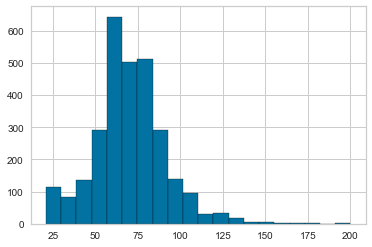

In [25]:
plt.hist(data3['LotFrontage'].drop(data3['LotFrontage'][data3['LotFrontage'] > 300.00].index), bins = 20, edgecolor = 'black');

In [26]:
skew_df

,Feature,Skew,Absolute Skew,Skewed
0,LotFrontage,1.340751,1.340751,True
1,LotArea,12.822431,12.822431,True
2,OverallQual,0.197110,0.197110,False
3,OverallCond,0.570312,0.570312,True
4,YearBuilt,-0.599806,0.599806,True
5,YearRemodAdd,-0.451020,0.451020,False
6,MasVnrArea,2.603682,2.603682,True
7,BsmtFinSF1,1.425516,1.425516,True
8,BsmtFinSF2,4.146111,4.146111,True
9,BsmtUnfSF,0.919322,0.919322,True


In [27]:
for column in skew_df.loc[skew_df['Skewed'],'Feature'].values:
    data3[column] = np.log1p(data3[column])

In [28]:
skew_df = pd.DataFrame(data3.select_dtypes(np.number).columns, columns = ['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature : skew(data3[feature]))
skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = [x > 0.5 for x in skew_df['Absolute Skew']]
skew_df

,Feature,Skew,Absolute Skew,Skewed
0,LotFrontage,-0.929468,0.929468,True
1,LotArea,-0.504751,0.504751,True
2,OverallQual,0.197110,0.197110,False
3,OverallCond,-0.746183,0.746183,True
4,YearBuilt,-0.626215,0.626215,True
5,YearRemodAdd,-0.451020,0.451020,False
6,MasVnrArea,0.511138,0.511138,True
7,BsmtFinSF1,-0.618036,0.618036,True
8,BsmtFinSF2,2.458996,2.458996,True
9,BsmtUnfSF,-2.159204,2.159204,True


(array([106.,   6.,  14.,  58.,  62.,  87., 242., 476., 566., 640., 336.,
        189.,  80.,  35.,  14.,   4.,   2.,   0.,   0.,   2.]),
 array([3.09104245, 3.22395998, 3.35687751, 3.48979503, 3.62271256,
        3.75563009, 3.88854761, 4.02146514, 4.15438267, 4.28730019,
        4.42021772, 4.55313525, 4.68605277, 4.8189703 , 4.95188783,
        5.08480535, 5.21772288, 5.35064041, 5.48355793, 5.61647546,
        5.74939299]),
 <BarContainer object of 20 artists>)

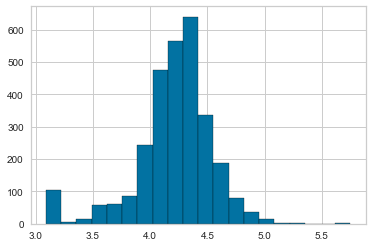

In [29]:
plt.hist(data3['LotFrontage'], bins = 20, edgecolor = 'black');

In [30]:
data3['MoSold'] = -np.cos(0.5236 * data3['MoSold'])
data3['MoSold']

0      -0.499998
1       0.866028
2      -0.000011
3      -0.499998
4      -1.000000
          ...   
1454    1.000000
1455    0.500004
1456   -0.000011
1457    0.866021
1458   -0.866032
Name: MoSold, Length: 2919, dtype: float64

In [31]:
data4 = data3.copy()
data4 = pd.get_dummies(data4)
data4

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,4.189655,9.042040,7,1.791759,7.602900,2003,5.283204,6.561031,0.0,5.017280,6.753438,6.753438,6.751101,0.0,7.444833,0.693147,0.000000,2,0.693147,3,0.693147,2.197225,0.000000,2003.0,2.0,548.0,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.000000,-0.499998,2008
1,4.394449,9.169623,6,2.197225,7.589336,1976,0.000000,6.886532,0.0,5.652489,7.141245,7.141245,0.000000,0.0,7.141245,0.000000,0.693147,2,0.000000,3,0.693147,1.945910,0.693147,1976.0,2.0,460.0,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.866028,2007
2,4.234107,9.328212,7,1.791759,7.601902,2002,5.093750,6.188264,0.0,6.075346,6.825460,6.825460,6.765039,0.0,7.488294,0.693147,0.000000,2,0.693147,3,0.693147,1.945910,0.693147,2001.0,2.0,608.0,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.000000,-0.000011,2008
3,4.110874,9.164401,7,1.791759,7.557995,1970,0.000000,5.379897,0.0,6.293419,6.629363,6.869014,6.629363,0.0,7.448916,0.693147,0.000000,1,0.000000,3,0.693147,2.079442,0.693147,1998.0,3.0,642.0,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.000000,-0.499998,2006
4,4.442651,9.565284,8,1.791759,7.601402,2000,5.860786,6.486161,0.0,6.196444,7.044033,7.044033,6.960348,0.0,7.695758,0.693147,0.000000,2,0.693147,4,0.693147,2.302585,0.693147,2000.0,3.0,836.0,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.000000,-1.000000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,3.091042,7.568896,4,2.079442,7.586296,1970,0.000000,0.000000,0.0,6.304449,6.304449,6.304449,6.304449,0.0,6.996681,0.000000,0.000000,1,0.693147,3,0.693147,1.791759,0.000000,1973.8,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000,2006
1455,3.091042,7.546974,4,1.791759,7.586296,1970,0.000000,5.533389,0.0,5.686975,6.304449,6.304449,6.304449,0.0,6.996681,0.000000,0.000000,1,0.693147,3,0.693147,1.945910,0.000000,1970.0,1.0,286.0,0.000000,3.218876,0.000000,0.0,0.0,0.0,0.000000,0.500004,2006
1456,5.081404,9.903538,5,2.079442,7.581210,1996,0.000000,7.110696,0.0,0.000000,7.110696,7.110696,0.000000,0.0,7.110696,0.693147,0.000000,1,0.000000,4,0.693147,2.079442,0.693147,1960.0,2.0,576.0,6.163315,0.000000,0.000000,0.0,0.0,0.0,0.000000,-0.000011,2006
1457,4.143135,9.253591,5,1.791759,7.597396,1992,0.000000,5.823046,0.0,6.356108,6.816736,6.878326,0.000000,0.0,6.878326,0.000000,0.693147,1,0.000000,3,0.693147,1.945910,0.000000,1966.2,0.0,0.0,4.394449,3.496508,0.000000,0.0,0.0,0.0,6.552508,0.866021,2006


In [32]:
data5 = data4.copy()

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(data5)
data5 = pd.DataFrame(sc.transform(data5), index = data5.index, columns = data5.columns)
data5


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-0.064176,-0.103719,0.646183,-0.435439,1.040634,0.896833,1.210174,0.783229,-0.363076,-0.326949,0.017291,-0.777287,1.196876,-0.116932,0.564627,1.135609,-0.251544,0.781366,1.265077,0.169927,-0.200513,1.016638,-0.986172,1.004438,0.306418,0.348787,-0.945126,0.832979,-0.427545,-0.112774,-0.309144,-0.066702,-0.189329,-1.264774,0.157646
1,0.536077,0.146544,-0.063185,1.906370,0.161526,-0.395604,-0.804554,0.892444,-0.363076,0.013428,0.347150,0.424865,-0.863610,-0.116932,-0.370371,-0.835139,3.888856,0.781366,-0.764608,0.169927,-0.200513,-0.198448,0.769705,-0.064627,0.306418,-0.059898,1.254212,-1.083169,-0.427545,-0.112774,-0.309144,-0.066702,-0.189329,0.785041,-0.602962
2,0.066112,0.457629,0.646183,-0.435439,0.975922,0.848965,1.137926,0.658154,-0.363076,0.240016,0.078551,-0.554028,1.201129,-0.116932,0.698477,1.135609,-0.251544,0.781366,1.265077,0.169927,-0.200513,-0.198448,0.769705,0.925248,0.306418,0.627436,-0.945126,0.663083,-0.427545,-0.112774,-0.309144,-0.066702,-0.189329,-0.514510,0.157646
3,-0.295084,0.136301,0.646183,-0.435439,-1.869638,-0.682812,-0.804554,0.386923,-0.363076,0.356870,-0.088244,-0.419015,1.159720,-0.116932,0.577201,1.135609,-0.251544,-1.027363,-0.764608,0.169927,-0.200513,0.447166,0.769705,0.806463,1.619830,0.785337,-0.945126,0.580589,2.738802,-0.112774,-0.309144,-0.066702,-0.189329,-1.264774,-1.363569
4,0.677357,0.922662,1.355551,-0.435439,0.943542,0.753229,1.430432,0.758108,-0.363076,0.304906,0.264464,0.123520,1.260739,-0.116932,1.337430,1.135609,-0.251544,0.781366,1.265077,1.385655,-0.200513,1.526048,0.769705,0.885653,1.619830,1.686303,1.085318,0.979467,-0.427545,-0.112774,-0.309144,-0.066702,-0.189329,-2.015061,0.157646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-3.284214,-2.993401,-1.481920,1.226101,-0.035461,-0.682812,-0.804554,-1.418196,-0.363076,0.362780,-0.364608,-2.169094,1.060554,-0.116932,-0.815601,-0.835139,-0.251544,-1.027363,1.265077,0.169927,-0.200513,-0.943755,-0.986172,-0.151736,-2.320407,-2.196208,-0.945126,-1.083169,-0.427545,-0.112774,-0.309144,-0.066702,-0.189329,0.986074,-1.363569
1455,-3.284214,-3.036401,-1.481920,-0.435439,-0.035461,-0.682812,-0.804554,0.438424,-0.363076,0.031907,-0.364608,-2.169094,1.060554,-0.116932,-0.815601,-0.835139,-0.251544,-1.027363,1.265077,0.169927,-0.200513,-0.198448,-0.986172,-0.302197,-1.006994,-0.867981,-0.945126,0.411292,-0.427545,-0.112774,-0.309144,-0.066702,-0.189329,0.235797,-1.363569
1456,2.549545,1.586172,-0.772552,1.226101,-0.365110,0.561757,-0.804554,0.967658,-0.363076,-3.015455,0.321166,0.330167,-0.863610,-0.116932,-0.464456,1.135609,-0.251544,-1.027363,-0.764608,1.385655,-0.200513,0.447166,0.769705,-0.698147,0.306418,0.478823,1.432796,-1.083169,-0.427545,-0.112774,-0.309144,-0.066702,-0.189329,-0.514510,-1.363569
1457,-0.200527,0.311255,-0.772552,-0.435439,0.683917,0.370284,-0.804554,0.535612,-0.363076,0.390461,0.071131,-0.390149,-0.863610,-0.116932,-1.180114,-0.835139,3.888856,-1.027363,-0.764608,0.169927,-0.200513,-0.198448,-0.986172,-0.452658,-2.320407,-2.196208,0.750334,0.540191,-0.427545,-0.112774,-0.309144,-0.066702,5.094980,0.785030,-1.363569


<AxesSubplot:>

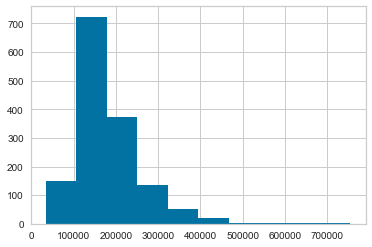

In [34]:
target.hist()

<AxesSubplot:>

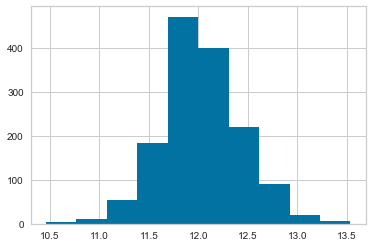

In [35]:
np.log(target).hist()

In [36]:
log_target = np.log(target)

In [37]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [38]:
data6 = data5.copy()
data6

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-0.064176,-0.103719,0.646183,-0.435439,1.040634,0.896833,1.210174,0.783229,-0.363076,-0.326949,0.017291,-0.777287,1.196876,-0.116932,0.564627,1.135609,-0.251544,0.781366,1.265077,0.169927,-0.200513,1.016638,-0.986172,1.004438,0.306418,0.348787,-0.945126,0.832979,-0.427545,-0.112774,-0.309144,-0.066702,-0.189329,-1.264774,0.157646
1,0.536077,0.146544,-0.063185,1.906370,0.161526,-0.395604,-0.804554,0.892444,-0.363076,0.013428,0.347150,0.424865,-0.863610,-0.116932,-0.370371,-0.835139,3.888856,0.781366,-0.764608,0.169927,-0.200513,-0.198448,0.769705,-0.064627,0.306418,-0.059898,1.254212,-1.083169,-0.427545,-0.112774,-0.309144,-0.066702,-0.189329,0.785041,-0.602962
2,0.066112,0.457629,0.646183,-0.435439,0.975922,0.848965,1.137926,0.658154,-0.363076,0.240016,0.078551,-0.554028,1.201129,-0.116932,0.698477,1.135609,-0.251544,0.781366,1.265077,0.169927,-0.200513,-0.198448,0.769705,0.925248,0.306418,0.627436,-0.945126,0.663083,-0.427545,-0.112774,-0.309144,-0.066702,-0.189329,-0.514510,0.157646
3,-0.295084,0.136301,0.646183,-0.435439,-1.869638,-0.682812,-0.804554,0.386923,-0.363076,0.356870,-0.088244,-0.419015,1.159720,-0.116932,0.577201,1.135609,-0.251544,-1.027363,-0.764608,0.169927,-0.200513,0.447166,0.769705,0.806463,1.619830,0.785337,-0.945126,0.580589,2.738802,-0.112774,-0.309144,-0.066702,-0.189329,-1.264774,-1.363569
4,0.677357,0.922662,1.355551,-0.435439,0.943542,0.753229,1.430432,0.758108,-0.363076,0.304906,0.264464,0.123520,1.260739,-0.116932,1.337430,1.135609,-0.251544,0.781366,1.265077,1.385655,-0.200513,1.526048,0.769705,0.885653,1.619830,1.686303,1.085318,0.979467,-0.427545,-0.112774,-0.309144,-0.066702,-0.189329,-2.015061,0.157646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-3.284214,-2.993401,-1.481920,1.226101,-0.035461,-0.682812,-0.804554,-1.418196,-0.363076,0.362780,-0.364608,-2.169094,1.060554,-0.116932,-0.815601,-0.835139,-0.251544,-1.027363,1.265077,0.169927,-0.200513,-0.943755,-0.986172,-0.151736,-2.320407,-2.196208,-0.945126,-1.083169,-0.427545,-0.112774,-0.309144,-0.066702,-0.189329,0.986074,-1.363569
1455,-3.284214,-3.036401,-1.481920,-0.435439,-0.035461,-0.682812,-0.804554,0.438424,-0.363076,0.031907,-0.364608,-2.169094,1.060554,-0.116932,-0.815601,-0.835139,-0.251544,-1.027363,1.265077,0.169927,-0.200513,-0.198448,-0.986172,-0.302197,-1.006994,-0.867981,-0.945126,0.411292,-0.427545,-0.112774,-0.309144,-0.066702,-0.189329,0.235797,-1.363569
1456,2.549545,1.586172,-0.772552,1.226101,-0.365110,0.561757,-0.804554,0.967658,-0.363076,-3.015455,0.321166,0.330167,-0.863610,-0.116932,-0.464456,1.135609,-0.251544,-1.027363,-0.764608,1.385655,-0.200513,0.447166,0.769705,-0.698147,0.306418,0.478823,1.432796,-1.083169,-0.427545,-0.112774,-0.309144,-0.066702,-0.189329,-0.514510,-1.363569
1457,-0.200527,0.311255,-0.772552,-0.435439,0.683917,0.370284,-0.804554,0.535612,-0.363076,0.390461,0.071131,-0.390149,-0.863610,-0.116932,-1.180114,-0.835139,3.888856,-1.027363,-0.764608,0.169927,-0.200513,-0.198448,-0.986172,-0.452658,-2.320407,-2.196208,0.750334,0.540191,-0.427545,-0.112774,-0.309144,-0.066702,5.094980,0.785030,-1.363569


In [39]:
train_processed = data5.iloc[: df_train.index.max() + 1, :].copy()
test_processed = data5.iloc[df_train.index.max() + 1 :, :].copy()

In [40]:
train_processed

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-0.064176,-0.103719,0.646183,-0.435439,1.040634,0.896833,1.210174,0.783229,-0.363076,-0.326949,0.017291,-0.777287,1.196876,-0.116932,0.564627,1.135609,-0.251544,0.781366,1.265077,0.169927,-0.200513,1.016638,-0.986172,1.004438,0.306418,0.348787,-0.945126,0.832979,-0.427545,-0.112774,-0.309144,-0.066702,-0.189329,-1.264774,0.157646
1,0.536077,0.146544,-0.063185,1.906370,0.161526,-0.395604,-0.804554,0.892444,-0.363076,0.013428,0.347150,0.424865,-0.863610,-0.116932,-0.370371,-0.835139,3.888856,0.781366,-0.764608,0.169927,-0.200513,-0.198448,0.769705,-0.064627,0.306418,-0.059898,1.254212,-1.083169,-0.427545,-0.112774,-0.309144,-0.066702,-0.189329,0.785041,-0.602962
2,0.066112,0.457629,0.646183,-0.435439,0.975922,0.848965,1.137926,0.658154,-0.363076,0.240016,0.078551,-0.554028,1.201129,-0.116932,0.698477,1.135609,-0.251544,0.781366,1.265077,0.169927,-0.200513,-0.198448,0.769705,0.925248,0.306418,0.627436,-0.945126,0.663083,-0.427545,-0.112774,-0.309144,-0.066702,-0.189329,-0.514510,0.157646
3,-0.295084,0.136301,0.646183,-0.435439,-1.869638,-0.682812,-0.804554,0.386923,-0.363076,0.356870,-0.088244,-0.419015,1.159720,-0.116932,0.577201,1.135609,-0.251544,-1.027363,-0.764608,0.169927,-0.200513,0.447166,0.769705,0.806463,1.619830,0.785337,-0.945126,0.580589,2.738802,-0.112774,-0.309144,-0.066702,-0.189329,-1.264774,-1.363569
4,0.677357,0.922662,1.355551,-0.435439,0.943542,0.753229,1.430432,0.758108,-0.363076,0.304906,0.264464,0.123520,1.260739,-0.116932,1.337430,1.135609,-0.251544,0.781366,1.265077,1.385655,-0.200513,1.526048,0.769705,0.885653,1.619830,1.686303,1.085318,0.979467,-0.427545,-0.112774,-0.309144,-0.066702,-0.189329,-2.015061,0.157646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.200527,-0.231508,-0.063185,-0.435439,0.911146,0.753229,-0.804554,-1.418196,-0.363076,0.660828,0.108495,-0.444901,1.133640,-0.116932,0.449086,-0.835139,-0.251544,0.781366,1.265077,0.169927,-0.200513,0.447166,0.769705,0.846058,0.306418,-0.059898,-0.945126,0.640970,-0.427545,-0.112774,-0.309144,-0.066702,-0.189329,0.235777,-0.602962
1456,0.711638,0.767440,-0.063185,0.454875,0.227056,0.178812,1.021136,0.820898,2.351183,0.403330,0.517469,1.962367,-0.863610,-0.116932,1.157188,1.135609,-0.251544,0.781366,-0.764608,0.169927,-0.200513,0.447166,1.796828,0.014563,0.306418,0.125868,1.314974,-1.083169,-0.427545,-0.112774,-0.309144,-0.066702,-0.189329,-1.264774,1.678860
1457,-0.020100,0.029092,0.646183,2.514892,-0.996100,1.040437,-0.804554,0.467619,-0.363076,0.616343,0.269644,0.237703,1.288139,-0.116932,1.530152,-0.835139,-0.251544,0.781366,-0.764608,1.385655,-0.200513,1.526048,1.796828,-1.450452,-1.006994,-1.025882,-0.945126,0.825429,-0.427545,-0.112774,-0.309144,-0.066702,6.120742,0.785041,1.678860
1458,0.066112,0.170303,-0.772552,0.454875,-0.696444,0.561757,-0.804554,-0.105594,3.329113,-3.015455,0.213223,-0.063225,-0.863610,-0.116932,-0.855305,1.135609,-0.251544,-1.027363,-0.764608,-1.045801,-0.200513,-0.943755,-0.986172,-1.094097,-1.006994,-1.081612,1.333273,-1.083169,2.240897,-0.112774,-0.309144,-0.066702,-0.189329,0.235797,1.678860


In [41]:
test_processed

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.536077,0.521437,-0.772552,0.454875,-0.332070,-1.113625,-0.804554,0.645518,2.285649,-0.013563,0.042712,-0.635877,-0.863610,-0.116932,-1.424253,-0.835139,-0.251544,-1.027363,-0.764608,-1.045801,-0.200513,-0.943755,-0.986172,-0.658552,-1.006994,1.194023,0.964198,-1.083169,-0.427545,-0.112774,2.976640,-0.066702,-0.189329,0.986074,1.678860
1,0.572040,0.923625,-0.063185,0.454875,-0.431241,-1.257229,0.984472,0.873044,-0.363076,0.204364,0.391116,0.585094,-0.863610,-0.116932,-0.211177,-0.835139,-0.251544,-1.027363,1.265077,0.169927,-0.200513,-0.198448,-0.986172,-0.777337,-1.006994,-0.747233,1.360662,0.593309,-0.427545,-0.112774,-0.309144,-0.066702,7.418425,0.986074,1.678860
2,0.310504,0.862607,-0.772552,-0.435439,0.846305,0.657493,-0.804554,0.821322,-0.363076,-0.375189,0.085908,-0.527218,1.136698,-0.116932,0.415262,-0.835139,-0.251544,0.781366,1.265077,0.169927,-0.200513,-0.198448,0.769705,0.766868,0.306418,0.042273,1.123361,0.567509,-0.427545,-0.112774,-0.309144,-0.066702,-0.189329,-0.514488,1.678860
3,0.462798,0.222291,-0.063185,0.454875,0.878733,0.657493,0.356462,0.729841,-0.363076,0.083804,0.084075,-0.533898,1.126531,-0.116932,0.367659,-0.835139,-0.251544,0.781366,1.265077,0.169927,-0.200513,0.447166,0.769705,0.806463,0.306418,-0.013457,1.326913,0.593309,-0.427545,-0.112774,-0.309144,-0.066702,-0.189329,0.986074,1.678860
4,-1.252596,-1.130892,1.355551,-0.435439,0.683917,0.370284,-0.804554,0.452704,-0.363076,0.695621,0.359187,0.468732,-0.863610,-0.116932,-0.326788,-0.835139,-0.251544,0.781366,-0.764608,-1.045801,-0.200513,-0.943755,-0.986172,0.568893,0.306418,0.153733,-0.945126,0.968412,-0.427545,-0.112774,3.100611,-0.066702,-0.189329,-1.814022,1.678860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-3.284214,-2.993401,-1.481920,1.226101,-0.035461,-0.682812,-0.804554,-1.418196,-0.363076,0.362780,-0.364608,-2.169094,1.060554,-0.116932,-0.815601,-0.835139,-0.251544,-1.027363,1.265077,0.169927,-0.200513,-0.943755,-0.986172,-0.151736,-2.320407,-2.196208,-0.945126,-1.083169,-0.427545,-0.112774,-0.309144,-0.066702,-0.189329,0.986074,-1.363569
1455,-3.284214,-3.036401,-1.481920,-0.435439,-0.035461,-0.682812,-0.804554,0.438424,-0.363076,0.031907,-0.364608,-2.169094,1.060554,-0.116932,-0.815601,-0.835139,-0.251544,-1.027363,1.265077,0.169927,-0.200513,-0.198448,-0.986172,-0.302197,-1.006994,-0.867981,-0.945126,0.411292,-0.427545,-0.112774,-0.309144,-0.066702,-0.189329,0.235797,-1.363569
1456,2.549545,1.586172,-0.772552,1.226101,-0.365110,0.561757,-0.804554,0.967658,-0.363076,-3.015455,0.321166,0.330167,-0.863610,-0.116932,-0.464456,1.135609,-0.251544,-1.027363,-0.764608,1.385655,-0.200513,0.447166,0.769705,-0.698147,0.306418,0.478823,1.432796,-1.083169,-0.427545,-0.112774,-0.309144,-0.066702,-0.189329,-0.514510,-1.363569
1457,-0.200527,0.311255,-0.772552,-0.435439,0.683917,0.370284,-0.804554,0.535612,-0.363076,0.390461,0.071131,-0.390149,-0.863610,-0.116932,-1.180114,-0.835139,3.888856,-1.027363,-0.764608,0.169927,-0.200513,-0.198448,-0.986172,-0.452658,-2.320407,-2.196208,0.750334,0.540191,-0.427545,-0.112774,-0.309144,-0.066702,5.094980,0.785030,-1.363569


In [42]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [43]:
rf = RandomForestRegressor()

kf = KFold(10)

score = cross_val_score(rf, train_processed, log_target, cv = kf, scoring = 'neg_mean_squared_error')

In [44]:
np.mean(-score)

0.020932345335147796

In [45]:
np.exp(np.sqrt(np.mean(-score)))

1.1556698682662878

setup(pd.concat([train_processed, pd.Series(log_target)], axis = 1), target = 'SalePrice')

In [49]:
compare_models(sort = 'mae')
# models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.0882,0.0183,0.1337,0.8830,0.0103,0.0074,2.2120
huber,Huber Regressor,0.0929,0.0207,0.1404,0.8657,0.0107,0.0077,0.0250
gbr,Gradient Boosting Regressor,0.0955,0.0213,0.1441,0.8653,0.0111,0.0080,0.1120
br,Bayesian Ridge,0.0955,0.0215,0.1433,0.8615,0.0110,0.0080,0.0130
ridge,Ridge Regression,0.0957,0.0214,0.1431,0.8617,0.0109,0.0080,0.0180
lr,Linear Regression,0.0958,0.0214,0.1432,0.8617,0.0109,0.0080,0.0160
lightgbm,Light Gradient Boosting Machine,0.0977,0.0211,0.1443,0.8651,0.0112,0.0082,0.0650
et,Extra Trees Regressor,0.0999,0.0223,0.1483,0.8579,0.0115,0.0083,0.2620
xgboost,Extreme Gradient Boosting,0.1015,0.0231,0.1500,0.8533,0.0116,0.0085,0.1430
rf,Random Forest Regressor,0.1047,0.0243,0.1550,0.8457,0.0120,0.0087,0.3300


In [52]:
from catboost import CatBoostRegressor
from sklearn.linear_model import HuberRegressor, BayesianRidge, Ridge, LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRFRegressor

In [54]:
baseline_model = CatBoostRegressor(verbose = 0)

In [56]:
baseline_model.fit(train_processed, log_target)

In [57]:
score1 = cross_val_score(baseline_model, train_processed, log_target, cv = kf, scoring = 'neg_mean_squared_error')

In [59]:
np.mean(-score1)

0.01651390303702185

In [60]:
np.exp(np.sqrt(np.mean(-score1)))

1.1371287351542925

In [61]:
IDs

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [63]:
pred = pd.Series(np.exp(baseline_model.predict(test_processed)))

In [64]:
pred

0       128732.542479
1       163907.750705
2       188685.527875
3       193545.197423
4       190489.583210
            ...      
1454     77962.974390
1455     85057.426092
1456    182023.106813
1457    114197.496859
1458    232496.147191
Length: 1459, dtype: float64

In [66]:
submission = pd.concat([IDs, pd.Series(pred, name = 'SalePrice')], axis = 1)
submission

,Id,SalePrice
0,1461,128732.542479
1,1462,163907.750705
2,1463,188685.527875
3,1464,193545.197423
4,1465,190489.583210
...,...,...
1454,2915,77962.974390
1455,2916,85057.426092
1456,2917,182023.106813
1457,2918,114197.496859


In [67]:
submission.to_csv('Submission.csv', index = False, header = True)